## k-means 文本聚类

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.pyplot as plt
import pandas as pd
import re
import jieba
import gensim
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/dfsj/yonyou/datasets/cnews/cnews.train.txt', delimiter="\t", header=None, names=["label", "data"])
print(df.label.unique())
df.head()

['体育' '娱乐' '家居' '房产' '教育' '时尚' '时政' '游戏' '科技' '财经']


,label,data
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [3]:
#去除文本中的表情字符（只保留中英文和数字）
def clear_character(sentence):
#     pattern1= '\[.*?\]'     
    pattern2 = re.compile('[^\u4e00-\u9fa5^a-z^A-Z^0-9]')   
#     line1=re.sub(pattern1,'',sentence)
    line2=re.sub(pattern2,'',sentence)   
    new_sentence=''.join(line2.split()) #去除空白
    return new_sentence

In [4]:
train_text = [clear_character(data) for data in df["data"]]

In [5]:
print(train_text[:1])

['马晓旭意外受伤让国奥警惕无奈大雨格外青睐殷家军记者傅亚雨沈阳报道来到沈阳国奥队依然没有摆脱雨水的困扰7月31日下午6点国奥队的日常训练再度受到大雨的干扰无奈之下队员们只慢跑了25分钟就草草收场31日上午10点国奥队在奥体中心外场训练的时候天就是阴沉沉的气象预报显示当天下午沈阳就有大雨但幸好队伍上午的训练并没有受到任何干扰下午6点当球队抵达训练场时大雨已经下了几个小时而且丝毫没有停下来的意思抱着试一试的态度球队开始了当天下午的例行训练25分钟过去了天气没有任何转好的迹象为了保护球员们国奥队决定中止当天的训练全队立即返回酒店在雨中训练对足球队来说并不是什么稀罕事但在奥运会即将开始之前全队变得娇贵了在沈阳最后一周的训练国奥队首先要保证现有的球员不再出现意外的伤病情况以免影响正式比赛因此这一阶段控制训练受伤控制感冒等疾病的出现被队伍放在了相当重要的位置而抵达沈阳之后中后卫冯萧霆就一直没有训练冯萧霆是7月27日在长春患上了感冒因此也没有参加29日跟塞尔维亚的热身赛队伍介绍说冯萧霆并没有出现发烧症状但为了安全起见这两天还是让他静养休息等感冒彻底好了之后再恢复训练由于有了冯萧霆这个例子因此国奥队对雨中训练就显得特别谨慎主要是担心球员们受凉而引发感冒造成非战斗减员而女足队员马晓旭在热身赛中受伤导致无缘奥运的前科也让在沈阳的国奥队现在格外警惕训练中不断嘱咐队员们要注意动作我们可不能再出这样的事情了一位工作人员表示从长春到沈阳雨水一路伴随着国奥队也邪了我们走到哪儿雨就下到哪儿在长春几次训练都被大雨给搅和了没想到来沈阳又碰到这种事情一位国奥球员也对雨水的青睐有些不解']


In [6]:
train_seg_text = [jieba.lcut(s) for s in train_text]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/pw5qfn8s59s4cllc8zjkqbqm0000gn/T/jieba.cache
Loading model cost 0.808 seconds.
Prefix dict has been built successfully.


In [7]:
stop_words_path = "./data/stopwords.txt"

def get_stop_words():
    return set([item.strip() for item in open(stop_words_path, 'r').readlines()])

stopwords = get_stop_words()

In [8]:
# 去掉文本中的停用词
def drop_stopwords(line):
    line_clean = []
    for word in line:
        if word in stopwords:
            continue
        line_clean.append(word)
    return line_clean

In [9]:
train_st_text = [drop_stopwords(s) for s in train_seg_text]

In [10]:
print(train_st_text[:1])

[['马晓旭', '意外', '受伤', '国奥', '警惕', '无奈', '大雨', '格外', '青睐', '殷家', '傅亚雨', '沈阳', '报道', '来到', '沈阳', '国奥队', '依然', '摆脱', '雨水', '困扰', '下午', '国奥队', '日常', '训练', '再度', '大雨', '干扰', '无奈', '之下', '队员', '慢跑', '分钟', '草草收场', '上午', '国奥队', '奥体中心', '外场', '训练', '阴沉沉', '气象预报', '显示', '当天', '下午', '沈阳', '大雨', '幸好', '队伍', '上午', '训练', '干扰', '下午', '点当', '球队', '抵达', '训练场', '大雨', '几个', '小时', '丝毫', '停下来', '试一试', '态度', '球队', '当天', '下午', '例行', '训练', '分钟', '天气', '转好', '迹象', '保护', '球员', '国奥队', '中止', '当天', '训练', '全队', '返回', '酒店', '训练', '足球队', '来说', '稀罕', '奥运会', '即将', '全队', '变得', '娇贵', '沈阳', '一周', '训练', '国奥队', '保证', '现有', '球员', '不再', '出现意外', '伤病', '情况', '影响', '正式', '比赛', '这一', '阶段', '控制', '训练', '受伤', '控制', '感冒', '疾病', '队伍', '放在', '位置', '抵达', '沈阳', '后卫', '冯萧霆', '训练', '冯萧霆', '长春', '患上', '感冒', '参加', '塞尔维亚', '热身赛', '队伍', '介绍', '冯萧霆', '发烧', '症状', '两天', '静养', '休息', '感冒', '恢复', '训练', '冯萧霆', '例子', '国奥队', '对雨中', '训练', '显得', '特别', '谨慎', '担心', '球员', '受凉', '引发', '感冒', '非战斗', '减员', '女足', '队员', '马晓旭', '热身赛', '受伤', '导致', '无缘', '奥运', '前科',

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(train_st_text, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[train_st_text], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(train_st_text)
print(data_words_bigrams[:1])

[['马晓旭', '意外', '受伤', '国奥', '警惕', '无奈', '大雨', '格外', '青睐', '殷家', '傅亚雨', '沈阳', '报道', '来到', '沈阳', '国奥队', '依然', '摆脱', '雨水', '困扰', '下午', '国奥队', '日常', '训练', '再度', '大雨', '干扰', '无奈_之下', '队员', '慢跑', '分钟', '草草收场', '上午', '国奥队', '奥体中心', '外场', '训练', '阴沉沉', '气象预报', '显示', '当天', '下午', '沈阳', '大雨', '幸好', '队伍', '上午', '训练', '干扰', '下午', '点当', '球队', '抵达', '训练场', '大雨', '几个', '小时', '丝毫', '停下来', '试一试', '态度', '球队', '当天', '下午', '例行_训练', '分钟', '天气', '转好', '迹象', '保护', '球员', '国奥队', '中止', '当天', '训练', '全队', '返回', '酒店', '训练', '足球队', '来说', '稀罕', '奥运会', '即将', '全队', '变得', '娇贵', '沈阳', '一周', '训练', '国奥队', '保证', '现有', '球员', '不再', '出现意外', '伤病', '情况', '影响', '正式', '比赛', '这一', '阶段', '控制', '训练', '受伤', '控制', '感冒', '疾病', '队伍', '放在', '位置', '抵达', '沈阳', '后卫', '冯萧霆', '训练', '冯萧霆', '长春', '患上_感冒', '参加', '塞尔维亚', '热身赛', '队伍', '介绍', '冯萧霆', '发烧_症状', '两天', '静养', '休息', '感冒', '恢复', '训练', '冯萧霆', '例子', '国奥队', '对雨中', '训练', '显得', '特别', '谨慎', '担心', '球员', '受凉', '引发', '感冒', '非战斗', '减员', '女足', '队员', '马晓旭', '热身赛', '受伤', '导致', '无缘', '奥运', '前科', '沈阳', '国奥队'

In [14]:
corpus = [' '.join(line) for line in data_words_bigrams]

In [15]:
corpus[:1]

['马晓旭 意外 受伤 国奥 警惕 无奈 大雨 格外 青睐 殷家 傅亚雨 沈阳 报道 来到 沈阳 国奥队 依然 摆脱 雨水 困扰 下午 国奥队 日常 训练 再度 大雨 干扰 无奈_之下 队员 慢跑 分钟 草草收场 上午 国奥队 奥体中心 外场 训练 阴沉沉 气象预报 显示 当天 下午 沈阳 大雨 幸好 队伍 上午 训练 干扰 下午 点当 球队 抵达 训练场 大雨 几个 小时 丝毫 停下来 试一试 态度 球队 当天 下午 例行_训练 分钟 天气 转好 迹象 保护 球员 国奥队 中止 当天 训练 全队 返回 酒店 训练 足球队 来说 稀罕 奥运会 即将 全队 变得 娇贵 沈阳 一周 训练 国奥队 保证 现有 球员 不再 出现意外 伤病 情况 影响 正式 比赛 这一 阶段 控制 训练 受伤 控制 感冒 疾病 队伍 放在 位置 抵达 沈阳 后卫 冯萧霆 训练 冯萧霆 长春 患上_感冒 参加 塞尔维亚 热身赛 队伍 介绍 冯萧霆 发烧_症状 两天 静养 休息 感冒 恢复 训练 冯萧霆 例子 国奥队 对雨中 训练 显得 特别 谨慎 担心 球员 受凉 引发 感冒 非战斗 减员 女足 队员 马晓旭 热身赛 受伤 导致 无缘 奥运 前科 沈阳 国奥队 格外 警惕 训练 嘱咐 队员 动作 再出 事情 工作人员 长春_沈阳 雨水 一路 伴随 国奥队 长春 几次 训练 大雨 搅和 没想到 沈阳 碰到 事情 国奥 球员 雨水 青睐 不解']

## 文本向量化

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer

# Perform an IDF normalization on the output of HashingVectorizer
hasher = HashingVectorizer(n_features=250000, alternate_sign=False, norm=None)
vectorizer_hash_idf = make_pipeline(hasher, TfidfTransformer())

In [23]:
vectorizer_hash = HashingVectorizer(n_features=250000, alternate_sign=False, norm='l2')

In [24]:
vectorizer_tfidf = TfidfVectorizer(max_df=0.5, min_df=2, use_idf=True)

In [25]:
X_hash_idf = vectorizer_hash_idf.fit_transform(corpus)
X_hash = vectorizer_hash.fit_transform(corpus)
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

In [26]:
print(X_hash_idf.shape)
print(X_hash.shape)
print(X_tfidf.shape)

(50000, 250000)
(50000, 250000)
(50000, 207705)


In [30]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

print("Performing dimensionality reduction using LSA")
# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_hash_idf_lsa = lsa.fit_transform(X_hash_idf)
X_hash_lsa = lsa.fit_transform(X_hash)
X_tfidf_lsa = lsa.fit_transform(X_tfidf)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Performing dimensionality reduction using LSA
Explained variance of the SVD step: 11%



In [48]:
print(X_hash_idf_lsa.shape)
print(X_hash_lsa.shape)
print(X_tfidf_lsa.shape)

(50000, 100)
(50000, 100)
(50000, 100)


In [37]:
minikm_X_hash_idf_lsa = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, init_size=1000, batch_size=1000, verbose=False)
minikm_X_hash_idf_lsa.fit(X_hash_idf_lsa)
minikm_X_hash_lsa = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, init_size=1000, batch_size=1000, verbose=False)
minikm_X_hash_lsa.fit(X_hash_lsa)
minikm_X_tfidf_lsa = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, init_size=1000, batch_size=1000, verbose=False)
minikm_X_tfidf_lsa.fit(X_tfidf_lsa)

minikm_X_hash_idf = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, init_size=1000, batch_size=1000, verbose=False)
minikm_X_hash_idf.fit(X_hash_idf)
minikm_X_hash = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, init_size=1000, batch_size=1000, verbose=False)
minikm_X_hash.fit(X_hash)
minikm_X_tfidf = MiniBatchKMeans(n_clusters=10, init='k-means++', n_init=1, init_size=1000, batch_size=1000, verbose=False)
minikm_X_tfidf.fit(X_tfidf)

km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
km_X_hash_idf_lsa = km.fit(X_hash_idf_lsa)
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
km_X_hash_lsa = km.fit(X_hash_lsa)
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
km_X_tfidf_lsa = km.fit(X_tfidf_lsa)

km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
km_X_hash_idf = km.fit(X_hash_idf)
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
km_X_hash = km.fit(X_hash)
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, verbose=False)
km_X_tfidf = km.fit(X_tfidf)

In [59]:
from sklearn import metrics

labels = df.label

Xs = [X_hash_idf_lsa, X_hash_lsa, X_tfidf_lsa, 
     X_hash_idf, X_hash, X_tfidf, 
     X_hash_idf_lsa, X_hash_lsa, X_tfidf_lsa,
     X_hash_idf, X_hash, X_tfidf]

for index, method in enumerate([minikm_X_hash_idf_lsa, minikm_X_hash_lsa, minikm_X_tfidf_lsa,
          minikm_X_hash_idf, minikm_X_hash, minikm_X_tfidf,
          km_X_hash_idf_lsa, km_X_hash_lsa, km_X_tfidf_lsa,
          km_X_hash_idf, km_X_hash, km_X_tfidf]):
    print("-----------------------------  {}  -----------------------------------".format(index))
    X = Xs[index]
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, method.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, method.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, method.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, method.labels_))
#     print("Silhouette Coefficient: %0.3f"
#           % metrics.silhouette_score(X, method.labels_, metric='euclidean'))
#     if index in [3, 4, 5, 9, 10, 11]:
#         X = X.todense()            # 计算量太大，放弃
    
    print("Calinski-Harabaz Index: %0.3f"
          % metrics.calinski_harabasz_score(X, km.labels_))


-----------------------------  0  -----------------------------------
Homogeneity: 0.649
Completeness: 0.704
V-measure: 0.675
Adjusted Rand-Index: 0.499
Calinski-Harabaz Index: 1731.221
-----------------------------  1  -----------------------------------
Homogeneity: 0.600
Completeness: 0.632
V-measure: 0.616
Adjusted Rand-Index: 0.508
Calinski-Harabaz Index: 1660.926
-----------------------------  2  -----------------------------------
Homogeneity: 0.629
Completeness: 0.660
V-measure: 0.644
Adjusted Rand-Index: 0.511
Calinski-Harabaz Index: 1732.760
-----------------------------  3  -----------------------------------
Homogeneity: 0.510
Completeness: 0.615
V-measure: 0.557
Adjusted Rand-Index: 0.259


KeyboardInterrupt: 

In [43]:
# minikm-tfidf-lsa
print("Top terms per cluster:")
original_space_centroids = svd.inverse_transform(minikm_X_tfidf_lsa.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 银行 陈水扁 贷款 信用卡 客户 吴淑珍 理财产品 业务 检方 台湾
Cluster 1: 游戏 玩家 中国 学生 留学 大学 美国 活动 工作 发展
Cluster 2: 电影 导演 影片 拍摄 观众 演员 角色 新浪_娱乐 上映 香港
Cluster 3: 生活 美国 中国 英国 孩子 活动 工作 设计 时间 喜欢
Cluster 4: 比赛 球队 球员 火箭 热火 篮板 奇才 防守 时间 赛季
Cluster 5: 市场 房地产 项目 企业 价格 公司 中国 亿元 投资 开发商
Cluster 6: 基金 投资 公司 市场 债券 投资者 股票 收益 经理 下跌
Cluster 7: 搭配 时尚 性感 组图 黑色 装扮 外套 设计 造型 可爱
Cluster 8: 科学家 发现 研究 地球 美国 人类 时间 英国 动物 研究_人员
Cluster 9: 空间 色彩 设计 客厅 风格 装饰 卧室 家居 家具 白色


In [44]:
# minikm-tfidf
print("Top terms per cluster:")
order_centroids = minikm_X_tfidf.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 移民 投资 加拿大 申请 申请人 签证 美国 澳洲 技术移民 澳大利亚
Cluster 1: 基金 投资 公司 债券 市场 投资者 收益 股票 经理 发行
Cluster 2: 奇才 阿联 易建联 沃尔 比赛 球队 刘易斯 阿里_纳斯 麦基 莱切
Cluster 3: 市场 房地产 银行 项目 投资 房价 企业 开发商 中国 亿元
Cluster 4: 学生 大学 学校 申请 美国 专业 课程 留学 学院 学习
Cluster 5: 留学 学生 留学生 中国 学校 教育 签证 申请 美国 大学
Cluster 6: 游戏 玩家 中国 美国 活动 发现 时间 陈水扁 工作 世界
Cluster 7: 电影 导演 影片 票房 观众 拍摄 演员 上映 新浪_娱乐 角色
Cluster 8: 比赛 火箭 热火 球队 球员 篮板 科比 防守 湖人 詹姆斯
Cluster 9: 搭配 时尚 设计 风格 色彩 组图 黑色 性感 白色 装扮


In [46]:
# km-tfidf-lsa
print("Top terms per cluster:")
original_space_centroids = svd.inverse_transform(minikm_X_tfidf_lsa.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 银行 陈水扁 贷款 信用卡 客户 吴淑珍 理财产品 业务 检方 台湾
Cluster 1: 游戏 玩家 中国 学生 留学 大学 美国 活动 工作 发展
Cluster 2: 电影 导演 影片 拍摄 观众 演员 角色 新浪_娱乐 上映 香港
Cluster 3: 生活 美国 中国 英国 孩子 活动 工作 设计 时间 喜欢
Cluster 4: 比赛 球队 球员 火箭 热火 篮板 奇才 防守 时间 赛季
Cluster 5: 市场 房地产 项目 企业 价格 公司 中国 亿元 投资 开发商
Cluster 6: 基金 投资 公司 市场 债券 投资者 股票 收益 经理 下跌
Cluster 7: 搭配 时尚 性感 组图 黑色 装扮 外套 设计 造型 可爱
Cluster 8: 科学家 发现 研究 地球 美国 人类 时间 英国 动物 研究_人员
Cluster 9: 空间 色彩 设计 客厅 风格 装饰 卧室 家居 家具 白色


In [47]:
# km-tfidf
print("Top terms per cluster:")
order_centroids = km_X_tfidf.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 中国 发展 移民 经济 企业 人民币 投资 美国 合作 国家
Cluster 1: 基金 投资 公司 债券 市场 投资者 股票 经理 收益 发行
Cluster 2: 比赛 火箭 球队 热火 球员 奇才 篮板 防守 湖人 新浪_体育讯
Cluster 3: 学生 留学 大学 学校 申请 留学生 美国 中国 专业 教育
Cluster 4: 空间 设计 色彩 家具 风格 家居 装饰 装修 客厅 卧室
Cluster 5: 房地产 市场 银行 房价 项目 开发商 楼市 土地 亿元 投资
Cluster 6: 游戏 玩家 开发 系统 活动 pc 系列 模式 体验 公布
Cluster 7: 电影 导演 影片 票房 观众 演员 拍摄 上映 新浪_娱乐 角色
Cluster 8: 美国 发现 陈水扁 时间 活动 科学家 北京 工作 公司 中国
Cluster 9: 搭配 时尚 黑色 性感 组图 装扮 外套 设计 点评 款式


In [60]:
result = list(minikm_X_tfidf.predict(X_tfidf))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))
print(-minikm_X_tfidf.score(X_tfidf))

Cluster distribution:
{6: 24837, 8: 3624, 2: 748, 7: 4377, 4: 1245, 3: 5499, 9: 5616, 1: 2259, 5: 1382, 0: 413}
48097.83211562563


### 可视化

## kaggle

In [26]:
tfidf = TfidfVectorizer(min_df=5, max_df=0.95)
tfidf.fit(corpus)
text = tfidf.transform(corpus)

Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters


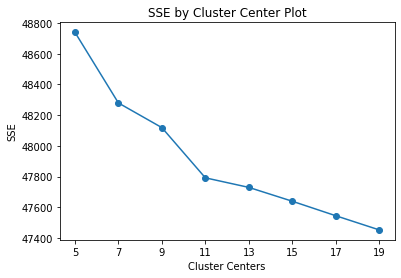

In [32]:
def find_optimal_clusters(data, max_k):
    iters = range(5, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init="k-means++", init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)